#Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Importing the dataset

In [2]:
missing_values = ["n/a", "na", "--"]
dataset = pd.read_csv('who.csv',na_values = missing_values)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Take a Quick Look at the Data Structure

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
dataset["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

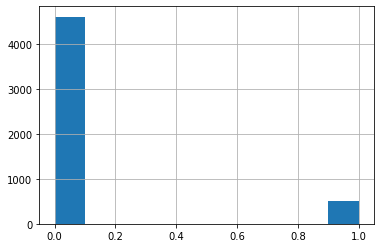

In [7]:
dataset["hypertension"].hist()

In [8]:
dataset["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

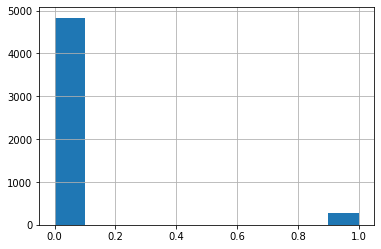

In [9]:
dataset["heart_disease"].hist()

In [10]:
dataset["avg_glucose_level"].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

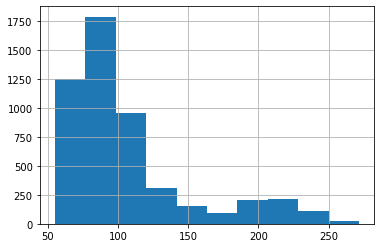

In [11]:
dataset["avg_glucose_level"].hist()

In [12]:
dataset["avg_glucose_level_cat"] = pd.cut(dataset["avg_glucose_level"],
                               bins=[50, 100, 150, 200, 250, 300, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])
dataset["avg_glucose_level_cat"].value_counts()


1    3131
2    1249
4     409
3     296
5      25
6       0
Name: avg_glucose_level_cat, dtype: int64

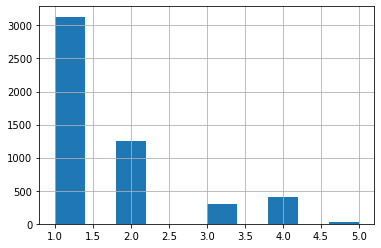

In [13]:
dataset["avg_glucose_level_cat"].hist()


# Taking care of missing data

In [14]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
incomplete_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,4
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,4
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,4
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,3


In [15]:
median = dataset["bmi"].median()
dataset["bmi"].fillna(median, inplace=True)
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,4
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3


In [16]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
incomplete_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_cat


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
#Estos son las features no numericas, despues se trabajaran en ellas
dataset_num = dataset.drop("gender", axis=1)
dataset_num = dataset_num.drop("ever_married", axis=1)
dataset_num = dataset_num.drop("work_type", axis=1)
dataset_num = dataset_num.drop("Residence_type", axis=1)
dataset_num = dataset_num.drop("smoking_status", axis=1)
dataset_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,avg_glucose_level_cat
0,9046,67.0,0,1,228.69,36.6,1,4
1,51676,61.0,0,0,202.21,28.1,1,4
2,31112,80.0,0,1,105.92,32.5,1,2
3,60182,49.0,0,0,171.23,34.4,1,3
4,1665,79.0,1,0,174.12,24.0,1,3


In [19]:
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([3.6932e+04, 4.5000e+01, 0.0000e+00, 0.0000e+00, 9.1885e+01,
       2.8100e+01, 0.0000e+00, 1.0000e+00])

In [21]:
dataset_num.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([3.6932e+04, 4.5000e+01, 0.0000e+00, 0.0000e+00, 9.1885e+01,
       2.8100e+01, 0.0000e+00])

In [22]:
X = dataset.drop("stroke", axis=1)
y =  dataset["stroke"]

# Encoding categorical data

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["gender","ever_married","work_type","Residence_type","smoking_status"])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[  0.     1.     0.   ... 228.69  36.6    4.  ]
 [  1.     0.     0.   ... 202.21  28.1    4.  ]
 [  0.     1.     0.   ... 105.92  32.5    2.  ]
 ...
 [  1.     0.     0.   ...  82.99  30.6    1.  ]
 [  0.     1.     0.   ... 166.29  25.6    3.  ]
 [  1.     0.     0.   ...  85.28  26.2    1.  ]]


In [24]:
print(X)

[[  0.     1.     0.   ... 228.69  36.6    4.  ]
 [  1.     0.     0.   ... 202.21  28.1    4.  ]
 [  0.     1.     0.   ... 105.92  32.5    2.  ]
 ...
 [  1.     0.     0.   ...  82.99  30.6    1.  ]
 [  0.     1.     0.   ... 166.29  25.6    3.  ]
 [  1.     0.     0.   ...  85.28  26.2    1.  ]]


In [25]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train

array([[  1.  ,   0.  ,   0.  , ...,  67.29,  36.7 ,   1.  ],
       [  1.  ,   0.  ,   0.  , ...,  83.53,  48.5 ,   1.  ],
       [  0.  ,   1.  ,   0.  , ...,  65.16,  30.8 ,   1.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  94.71,  28.4 ,   1.  ],
       [  0.  ,   1.  ,   0.  , ..., 120.94,  29.7 ,   2.  ],
       [  1.  ,   0.  ,   0.  , ...,  59.52,  33.2 ,   1.  ]])

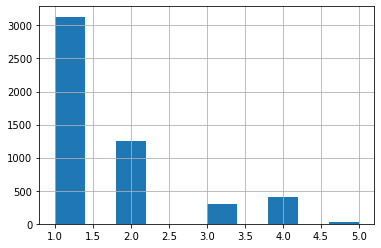

In [27]:
dataset["avg_glucose_level_cat"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["avg_glucose_level_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [29]:
strat_test_set["avg_glucose_level_cat"].value_counts() / len(strat_test_set)


1    0.612524
2    0.244618
4    0.080235
3    0.057730
5    0.004892
6    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [30]:
dataset["avg_glucose_level_cat"].value_counts() / len(dataset)


1    0.612720
2    0.244423
4    0.080039
3    0.057926
5    0.004892
6    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [31]:
def avg_glucose_level_proportions(data):
    return data["avg_glucose_level_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": avg_glucose_level_proportions(dataset),
    "Stratified": avg_glucose_level_proportions(strat_test_set),
    "Random": avg_glucose_level_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.612720,0.612524,0.628180,2.523156,-0.031939
2,0.244423,0.244618,0.239726,-1.921537,0.080064
3,0.057926,0.057730,0.051859,-10.472973,-0.337838
4,0.080039,0.080235,0.074364,-7.090465,0.244499
5,0.004892,0.004892,0.005871,20.000000,0.000000
6,0.000000,0.000000,0.000000,NaN,NaN


In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("avg_glucose_level_cat", axis=1, inplace=True)


#Looking for Correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f242d7ad0>,
      dtype=object)

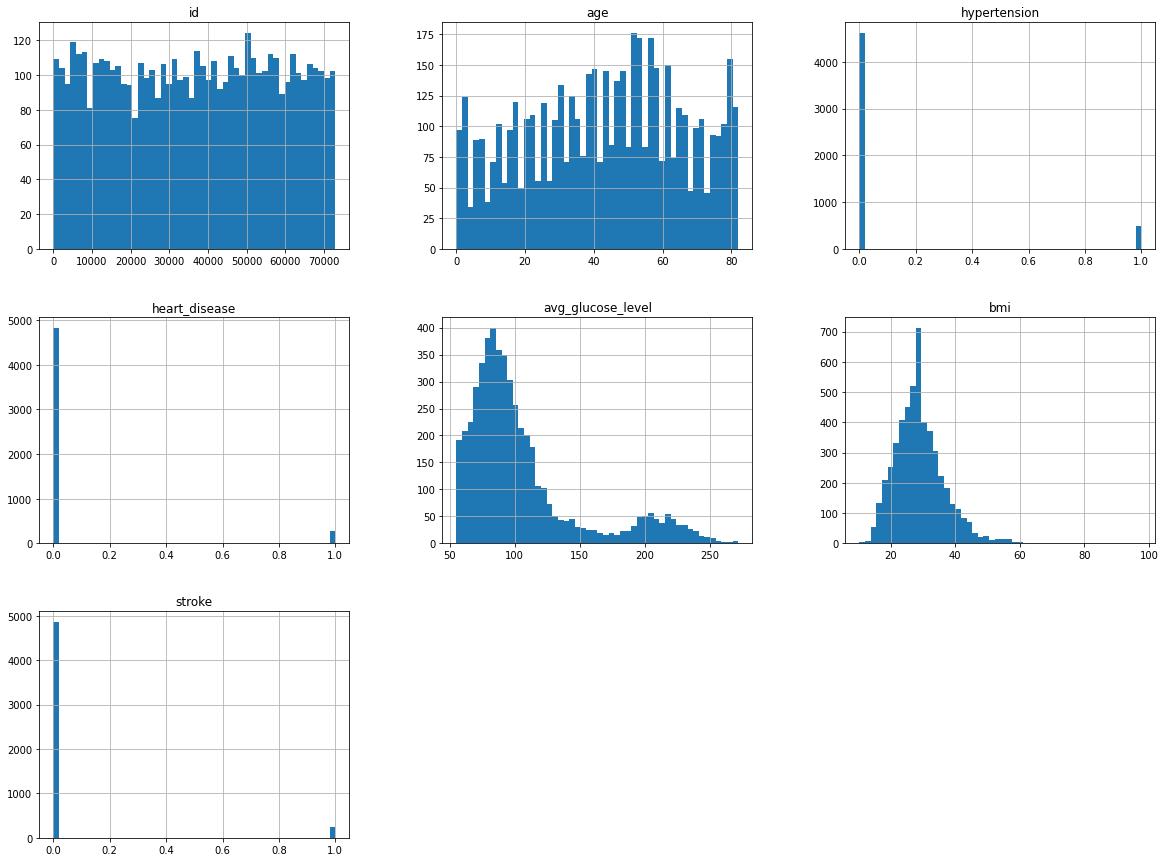

In [33]:
dataset.hist(bins=50, figsize=(20,15))


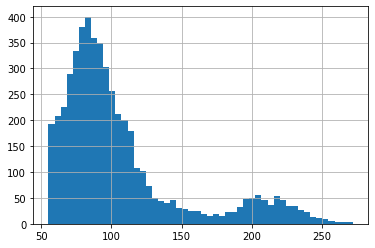

In [34]:
dataset["avg_glucose_level"].hist(bins=50)


In [35]:
corr_matrix = dataset.corr()
corr_matrix["stroke"].sort_values(ascending=False)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.036110
id                   0.006388
Name: stroke, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f23aeaf50>,
      dtype=object)

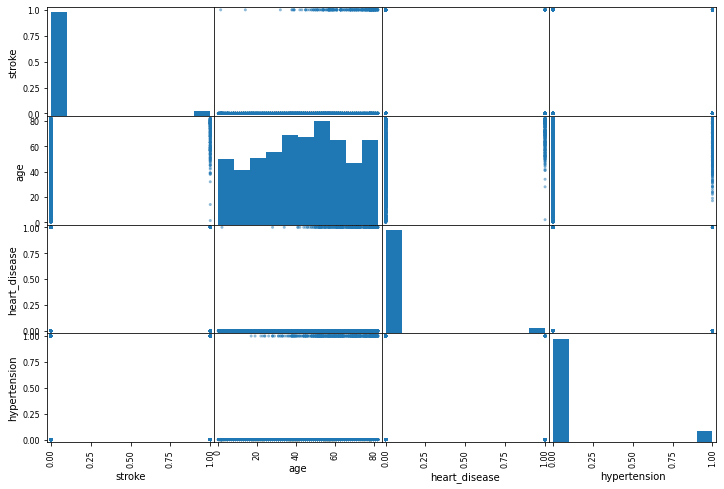

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease", "hypertension"]
scatter_matrix(dataset[attributes], figsize=(12, 8))


# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[968   0]
 [ 53   1]]


In [41]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  1
False Positive(FP) =  0
True Negative(TN)  =  968
False Negative(FN) =  53


In [42]:
accuracy_score(y_test, y_pred)

0.9481409001956947

In [43]:
precision_score(y_test, y_pred)

1.0

In [44]:
recall_score(y_test, y_pred)

0.018518518518518517

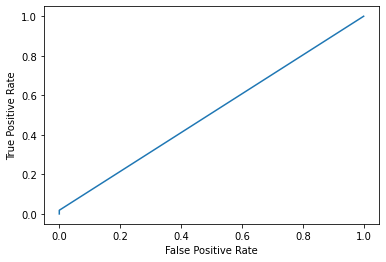

In [45]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the K-NN model on the Training set

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[967   1]
 [ 52   2]]


In [49]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2
False Positive(FP) =  1
True Negative(TN)  =  967
False Negative(FN) =  52


In [50]:
accuracy_score(y_test, y_pred)

0.9481409001956947

In [51]:
precision_score(y_test, y_pred)

0.6666666666666666

In [52]:
recall_score(y_test, y_pred)

0.037037037037037035

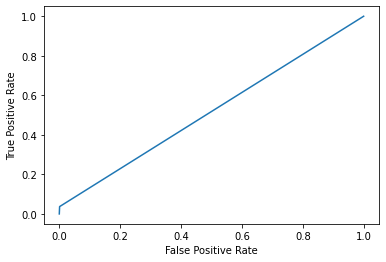

In [53]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the SVM model on the Training set

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[968   0]
 [ 54   0]]


In [57]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  0
False Positive(FP) =  0
True Negative(TN)  =  968
False Negative(FN) =  54


In [58]:
accuracy_score(y_test, y_pred)

0.9471624266144814

In [59]:
precision_score(y_test, y_pred,zero_division=0)

0.0

In [60]:
recall_score(y_test, y_pred)

0.0

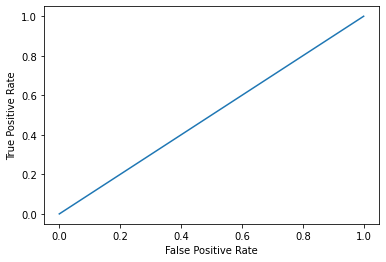

In [61]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the Kernel SVM model on the Training set


In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[968   0]
 [ 54   0]]


In [65]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  0
False Positive(FP) =  0
True Negative(TN)  =  968
False Negative(FN) =  54


In [66]:
accuracy_score(y_test, y_pred)

0.9471624266144814

In [67]:
precision_score(y_test, y_pred,zero_division=0)

0.0

In [68]:
recall_score(y_test, y_pred)

0.0

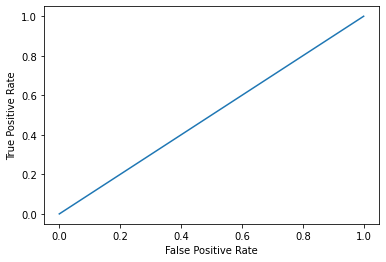

In [69]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the Decision Tree Classification model on the Training set

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [71]:
y_pred = classifier.predict(X_test)


In [72]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[929  39]
 [ 48   6]]


In [73]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  6
False Positive(FP) =  39
True Negative(TN)  =  929
False Negative(FN) =  48


In [74]:
accuracy_score(y_test, y_pred)

0.9148727984344422

In [75]:
precision_score(y_test, y_pred)

0.13333333333333333

In [76]:
recall_score(y_test, y_pred)

0.1111111111111111

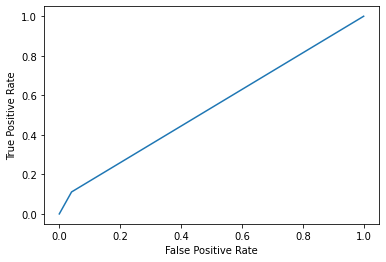

In [77]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the Random Forest Classification model on the Training set

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[967   1]
 [ 53   1]]


In [81]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1
False Positive(FP) =  1
True Negative(TN)  =  967
False Negative(FN) =  53


In [82]:
accuracy_score(y_test, y_pred)

0.9471624266144814

In [83]:
precision_score(y_test, y_pred)

0.5

In [84]:
recall_score(y_test, y_pred)

0.018518518518518517

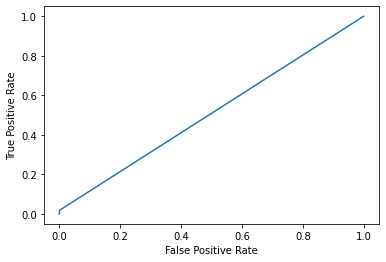

In [85]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training the Naive Bayes model on the Training set

In [86]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[145 823]
 [  2  52]]


In [89]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  52
False Positive(FP) =  823
True Negative(TN)  =  145
False Negative(FN) =  2


In [90]:
accuracy_score(y_test, y_pred)

0.19275929549902152

In [91]:
precision_score(y_test, y_pred)

0.05942857142857143

In [92]:
recall_score(y_test, y_pred)

0.9629629629629629

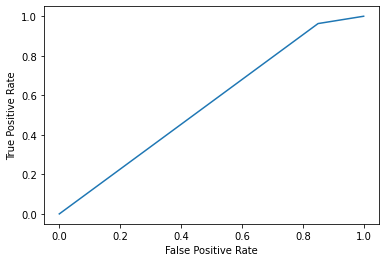

In [93]:
from sklearn import metrics
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Summary

In [94]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,zero_division=0)
    recall[key] = recall_score(predictions, y_test,zero_division=0)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [96]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.948141,0.018519,1.000000
Support Vector Machines,0.947162,0.000000,0.000000
Decision Trees,0.908023,0.148148,0.142857
Random Forest,0.947162,0.000000,0.000000
Naive Bayes,0.192759,0.962963,0.059429
K-Nearest Neighbor,0.948141,0.037037,0.666667


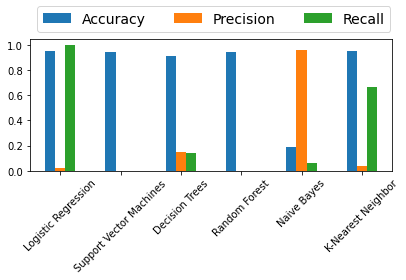

In [97]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()


#Fine-Tune Your Model